Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Loading the Data

In [2]:
mat = loadmat('ex7/ex7data2.mat')

In [3]:
X = mat['X']

K-Means Algorithm

In [4]:
initial_centroids = np.array([[3.0, 3.0], [6.0, 2.0], [8.0, 5.0]])

In [5]:
def FindClosestCentroids(X, initial_centroids):
    dist_all = []
    for i in range(initial_centroids.shape[0]):
        for j in range(X.shape[0]):
            dist = np.linalg.norm(X[j, :] - initial_centroids[i, :])
            dist_all.append(dist)
    dist_all = np.array(dist_all)
    dist_all = dist_all.reshape(-1, X.shape[0]).T
    assignment = np.argmin(dist_all, axis=1)
    return assignment

In [6]:
idx = FindClosestCentroids(X, initial_centroids)

In [7]:
def ComputeCentroids(X, idx, k):
    assignment_uniques = np.unique(idx)
    ps = X
    n = X.shape[1]
    centroid_array = np.empty((0,n), float)
    for a in range(k):
        inds = np.where(idx==a)
        ps_a = ps[inds[0], :]
        cent = np.mean(ps_a, axis=0)
        centroid_array = np.append(centroid_array, cent)
    return centroid_array.reshape(-1, n)

In [8]:
ComputeCentroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
def RunKMeans(X, init_centroids, k, max_iters):
    idx_hist = np.array(1)
    n = X.shape[1]
    centroid_hist = np.ones((1, n))
    for i in range(max_iters):
        idx = FindClosestCentroids(X, init_centroids)
        init_centroids = ComputeCentroids(X, idx, k)
        idx_hist = np.append(idx_hist, idx)
        centroid_hist = np.append(centroid_hist, init_centroids)
    idx_hist = idx_hist[1:].reshape(-1, X.shape[0]).T
    return init_centroids, idx, centroid_hist[n:], idx_hist

In [10]:
centroidsf, idxf, centroids_hist, idx_hist = RunKMeans(X, initial_centroids, 3, 10)

In [11]:
a = 0
b = 2
c = 4
hist1 = []
hist2 = []
hist3 = []
for i in range(10):
    hist1.append(centroids_hist[a])
    hist1.append(centroids_hist[a+1])
    hist2.append(centroids_hist[b])
    hist2.append(centroids_hist[b+1])
    hist3.append(centroids_hist[c])
    hist3.append(centroids_hist[c+1])
    a = a+6
    b = b+6
    c = c+6

In [12]:
hist1 = np.array(hist1)
hist2 = np.array(hist2)
hist3 = np.array(hist3)

In [13]:
hist1 = hist1.reshape(-1,2)
hist2 = hist2.reshape(-1,2)
hist3 = hist3.reshape(-1,2)

In [14]:
centroids_hist = np.hstack((hist1, hist2, hist3))

Plotting the Dataset along with Centroids Traversal through each iteration

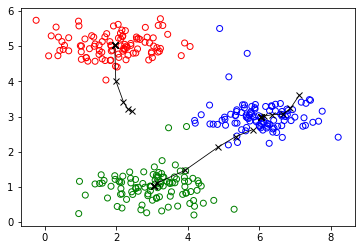

In [15]:
fig, ax1 = plt.subplots()
ax1.scatter(X[idxf==0][:, 0], X[idxf==0][:, 1], edgecolors='r', facecolors='none')
ax1.scatter(X[idxf==1][:, 0], X[idxf==1][:, 1], edgecolors='g', facecolors='none')
ax1.scatter(X[idxf==2][:, 0], X[idxf==2][:, 1], edgecolors='b', facecolors='none')
ax1.plot(centroids_hist[:, 0], centroids_hist[:, 1], color='k', linewidth=0.8, marker='x')
ax1.plot(centroids_hist[:, 2], centroids_hist[:, 3], color='k', linewidth=0.8, marker='x')
ax1.plot(centroids_hist[:, 4], centroids_hist[:, 5], color='k', linewidth=0.8, marker='x')

Random Initialization for Centroids

In [16]:
def RandInitCentroids(X, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[np.random.randint(0, X.shape[0]+1), :]
    return centroids

Image Compression with K-Means

In [17]:
mat2 = loadmat('ex7/bird_small.mat')

In [18]:
A = mat2['A']

In [19]:
A = A/255

In [20]:
A = A.reshape(128*128,3)

In [21]:
imageinitcentroids = RandInitCentroids(A, 16)

In [22]:
imgcentroids, imgidx, imgcentroids_hist, imgidx_hist = RunKMeans(A, imageinitcentroids, 16, 10)

In [23]:
imgcentroids.shape, imgidx.shape, imgcentroids_hist.shape, imgidx_hist.shape

((16, 3), (16384,), (480,), (16384, 10))

Displaying the Images

In [24]:
for a in range(16):
    inds = np.where(imgidx==a)
    A[inds[0], :] = imgcentroids[a]

In [25]:
A = A.reshape(128,128,3)

In [26]:
import matplotlib.image as mpimg

Original

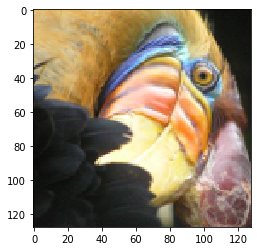

In [27]:
original = mpimg.imread('ex7/bird_small.png')
plt.imshow(original)

Compressed

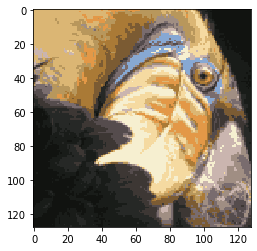

In [28]:
plt.imshow(A)